In [1]:
import sys
print(sys.executable)

import h5py
import numpy as np
import pandas as pd

print("Everything OK!")

/Users/barko/Desktop/BLUESENSE/OPIOID_OVERDOSE/.venv/bin/python
Everything OK!


Dosya yükleniyor...
Orijinal Veri Sayısı: 24,565 atış
Tespit edilen hatalı atış sayısı: 13
Hatalı atışların ilk 5 örneği (ms):
[41241.66666667  3700.          2479.16666667 70745.83333333
  3654.16666667]


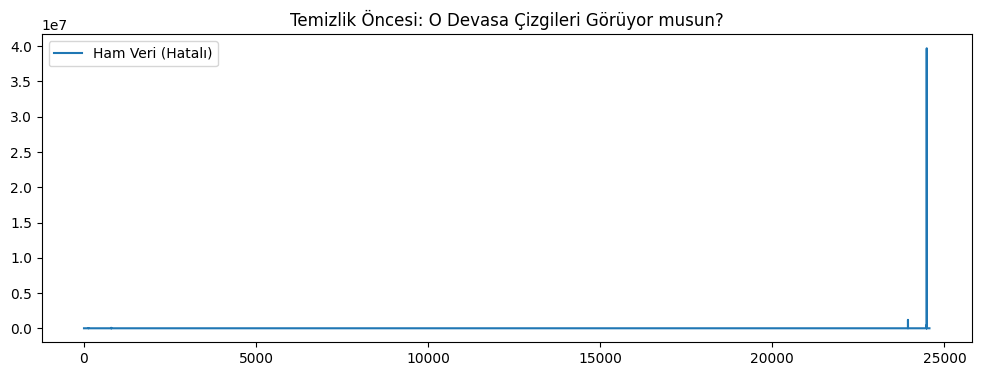


Temizlik Sonrası Veri Sayısı: 24,551 atış
Silinen atış sayısı: 14


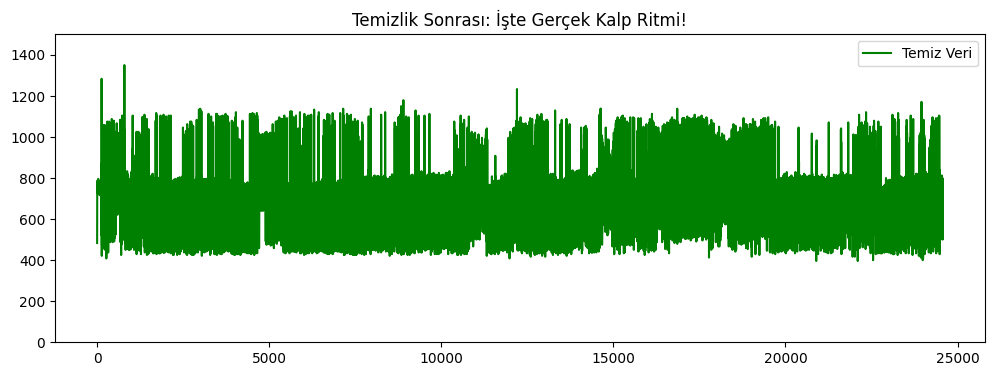


Harika! 'cleaned_rr_for_hrv.csv' dosyası oluşturuldu. B koduna bunu vereceğiz.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Dosyayı Yükle (Biraz sürebilir, 10-30 sn normaldir)
print("Dosya yükleniyor...")
df = pd.read_csv("../data/processed/3254689660/lead_II_FULL/per_beat_metrics.csv")
print(f"Orijinal Veri Sayısı: {len(df):,} atış")

# 2. Dedektiflik: "Canavarları" Görelim
# RR süresi 2000 ms (2 saniye) üzerindeki atışlara bakalım
outliers = df[df['RR_prev_ms'] > 2000]
print(f"Tespit edilen hatalı atış sayısı: {len(outliers)}")
print("Hatalı atışların ilk 5 örneği (ms):")
print(outliers['RR_prev_ms'].head().values)

# 3. Görsel Kanıt (Opsiyonel)
plt.figure(figsize=(12, 4))
plt.plot(df['RR_prev_ms'], label='Ham Veri (Hatalı)')
plt.title("Temizlik Öncesi: O Devasa Çizgileri Görüyor musun?")
plt.legend()
plt.show()

# 4. TEMİZLİK ANI (Filtreleme)
# Kural: 300ms ile 2000ms arası "İnsani" sınırlardır.
df_clean = df[(df['RR_prev_ms'] > 300) & (df['RR_prev_ms'] < 2000)].copy()

print(f"\nTemizlik Sonrası Veri Sayısı: {len(df_clean):,} atış")
print(f"Silinen atış sayısı: {len(df) - len(df_clean)}")

# 5. Temiz Grafiği Görelim
plt.figure(figsize=(12, 4))
plt.plot(df_clean['RR_prev_ms'], color='green', label='Temiz Veri')
plt.title("Temizlik Sonrası: İşte Gerçek Kalp Ritmi!")
plt.ylim(0, 1500) # Grafiği yakınlaştır
plt.legend()
plt.show()

# 6. B Dosyası İçin Kaydet
# Sadece gerekli sütunları (zaman ve RR) alarak daha hafif bir dosya yapalım
df_clean.to_csv("cleaned_rr_for_hrv.csv", index=False)
print("\nHarika! 'cleaned_rr_for_hrv.csv' dosyası oluşturuldu. B koduna bunu vereceğiz.")